In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import mne

In [4]:
df = pd.read_csv('data/EEG.machinelearing_data_BRMH.csv')
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [5]:
cols = []
for col in df.columns:
    cols.append(col)
    #print(col)

In [6]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [7]:
deltadf = df.loc[:, 'AB.A.delta.a.FP1':'AB.A.delta.s.O2']
thetadf = df.loc[:, 'AB.B.theta.a.FP1':'AB.B.theta.s.O2']
alphadf = df.loc[:, 'AB.C.alpha.a.FP1':'AB.C.alpha.s.O2']
betadf = df.loc[:, 'AB.D.beta.a.FP1':'AB.D.beta.s.O2']
highbetadf = df.loc[:, 'AB.E.highbeta.a.FP1':'AB.E.highbeta.s.O2']
gammadf = df.loc[:, 'AB.F.gamma.a.FP1':'AB.F.gamma.s.O2']
cohwaves = df.loc[:, 'COH.A.delta.a.FP1.b.FP2':'COH.F.gamma.r.O1.s.O2']
deltadf.head(5)

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,23.987650,14.741769,16.271815,18.376257,16.447620,16.409822,11.777727,18.278916,17.243432
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,12.742712,6.230904,11.238420,14.767063,15.653628,13.290791,8.538482,14.740076,9.326202
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,20.293571,11.946956,11.063130,20.956259,18.946034,16.965524,11.242449,11.812897,9.385839
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,8.816415,8.456443,17.676429,9.959183,9.877650,10.098478,10.612230,12.782252,8.645818
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,17.712593,18.278851,15.449687,9.239752,13.154119,34.529365,19.541089,10.434374,17.268496


In [8]:
standard_montage = mne.channels.make_standard_montage('standard_primed')
n_channels = len(standard_montage.ch_names)

In [9]:
standard_montage.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 "F7'",
 "F5'",
 "F3'",
 "F1'",
 "Fz'",
 "F2'",
 "F4'",
 "F6'",
 "F8'",
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 "F7''",
 "F5''",
 "F3''",
 "F1''",
 "Fz''",
 "F2''",
 "F4''",
 "F6''",
 "F8''",
 'T1',
 "T3'",
 "C5'",
 "C3'",
 "C1'",
 "Cz'",
 "C2'",
 "C4'",
 "C6'",
 "T4'",
 'T2',
 'T3',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T4',
 "T3''",
 "C5''",
 "C3''",
 "C1''",
 "Cz''",
 "C2''",
 "C4''",
 "C6''",
 "T4''",
 "T5'",
 "P5'",
 "P3'",
 "P1'",
 "Pz'",
 "P2'",
 "P4'",
 "P6'",
 "T6'",
 "Cb1'",
 'T5',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'T6',
 "Cb2'",
 'Cb1',
 "O1'",
 "P5''",
 "P3''",
 "P1''",
 "Pz''",
 "P2''",
 "P4''",
 "P6''",
 "O2'",
 'Cb2',
 'O1',
 'Oz',
 'O2',
 "Cb1''",
 'Iz',
 "Cb2''",
 'M1',
 'M2',
 'A1',
 'A2']

In [10]:
d=deltadf.rename(columns = lambda x : str(x)[13:])
d.head()

,FP1,FP2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2
0,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,23.987650,14.741769,16.271815,18.376257,16.447620,16.409822,11.777727,18.278916,17.243432
1,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,12.742712,6.230904,11.238420,14.767063,15.653628,13.290791,8.538482,14.740076,9.326202
2,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,20.293571,11.946956,11.063130,20.956259,18.946034,16.965524,11.242449,11.812897,9.385839
3,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,8.816415,8.456443,17.676429,9.959183,9.877650,10.098478,10.612230,12.782252,8.645818
4,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,17.712593,18.278851,15.449687,9.239752,13.154119,34.529365,19.541089,10.434374,17.268496


In [11]:
test = d.iloc[[0]].T
test.head()

,0
FP1,35.998557
FP2,21.717375
F7,21.518280
F3,26.825048
Fz,26.611516


In [12]:
testcols = []
for col in d.columns:
    testcols.append(col)
print(testcols)

['FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']


In [13]:
info = mne.create_info(ch_names = testcols, sfreq=128.,ch_types='eeg')

In [14]:
#evoked = mne.EvokedArray(test ,info)
#evoked.set_montage(standard_montage,on_missing ='warn',match_case = False)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 19 ch, ~32 kB>

In [209]:
# first we obtain the 3d positions of selected channels
chs = ['O1', 'O2', 'FP1', 'FP2','T3','T4','Cz']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

oz = (pos[0, 0]*pos[1, 0])/2
fpz = (pos[2,0]*pos[3,0])/2
tz = (pos[5,0]*pos[6,0])/2
# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
#radius =np.abs(pos[[4, 5], 0]).mean()-(pos[6, 0])
radius = 0.09494
# then we obtain the x, y, z sphere center this way:
# x: x position of the O1 and O2 channel (should be very close to 0)
# y: y position of the T3 and T4 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = oz
y = fpz
z = tz
#x = pos[0, 0]
#y = pos[-1, 1]
#z = pos[:, -1].mean()
# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['-0.00044', '0.00000', '-0.00006', '0.09494']


In [210]:
montage_head

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 19 channels>

In [211]:
ch_pos

OrderedDict([('FP1', array([-0.03090259,  0.11458518,  0.02786657])),
             ('FP2', array([0.0284095 , 0.11534631, 0.02772126])),
             ('F7', array([-0.07187663,  0.07310353,  0.02579046])),
             ('F3', array([-0.05180904,  0.0866879 ,  0.07871409])),
             ('Fz', array([-0.00122927,  0.09327445,  0.10263929])),
             ('F4', array([0.05027428, 0.08743839, 0.07727065])),
             ('F8', array([0.07143527, 0.07450513, 0.02510103])),
             ('T3', array([-0.08598208,  0.01487164,  0.03117337])),
             ('C3', array([-0.06714872,  0.02335823,  0.10451068])),
             ('Cz', array([-0.00137413,  0.02761709,  0.14019949])),
             ('C4', array([0.06532888, 0.0235731 , 0.10369243])),
             ('T4', array([0.08326137, 0.01525819, 0.03097297])),
             ('T5', array([-0.07445796, -0.04212316,  0.04127363])),
             ('P3', array([-0.05503823, -0.0442103 ,  0.09990898])),
             ('Pz', array([-0.00170945, -0.0452

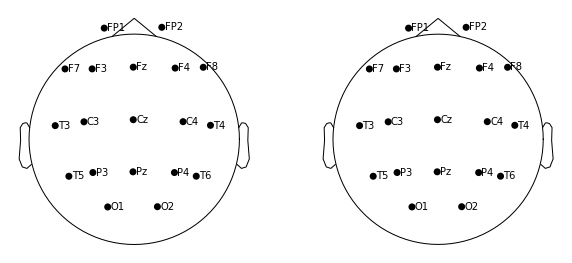

Text(0.5, 1.0, 'EEGLAB channel projection')

In [250]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(10, 6), gridspec_kw=dict(top=1),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
evoked.plot_sensors(axes=ax[0], show=False, show_names = True)

# in the second panel we plot the positions using the EEGLAB reference sphere
evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show_names = True)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')

Text(0.5, 1.0, 'EEGLAB')

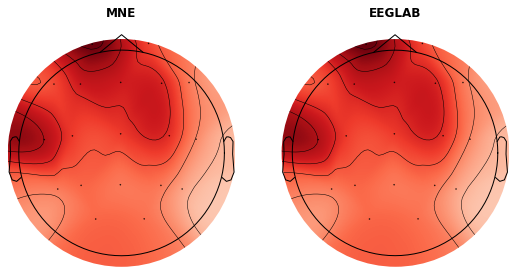

In [251]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4), gridspec_kw=dict(top=1),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(evoked.data[:, 0], evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')